In [37]:
import networkx as nx
import numpy as np
import timeit

In [38]:
G = nx.DiGraph()

# Exercice 1 – Tutoriel Networkx

In [74]:
G.add_nodes_from("ABCDEF")  
G.add_weighted_edges_from([('A', 'B',4)])
G.add_weighted_edges_from([('A', 'C',2)])
G.add_weighted_edges_from([('B', 'C',5)])
G.add_weighted_edges_from([('B', 'D',10)])  
G.add_weighted_edges_from([('C', 'E',3)])
G.add_weighted_edges_from([('E', 'F',14)])
G.add_weighted_edges_from([('D', 'F',11)])
G.add_weighted_edges_from([('E', 'D',4)])


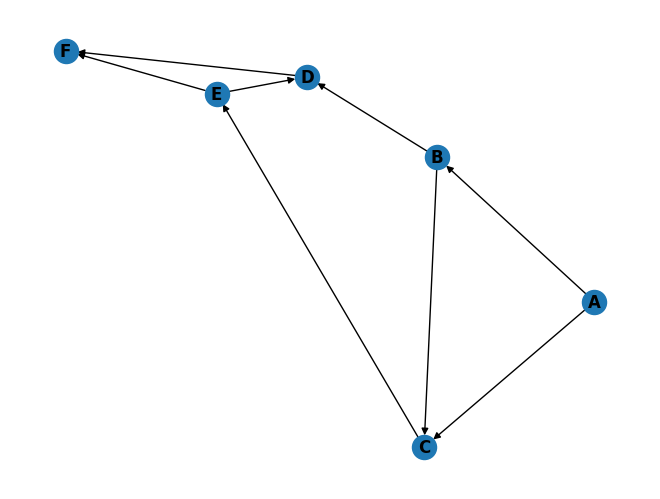

In [3]:
nx.draw(G, with_labels=True, font_weight='bold')

# Exercice 2 – Version récursive

In [72]:
def sort_path_recur(G,dest,memory):
    if dest in memory:
        return memory[dest]
    minn=1000000000000
    for pred in G.predecessors(dest):
        dist=sort_path_recur(G,pred,memory)+G[pred][dest]['weight']
        if dist<minn:
            minn=dist
            memory[dest]=dist
    return memory[dest]


# Exercice 3 – Version Bottom up

In [5]:
def bottom_up(G,src):
    order=nx.topological_sort(G)
    mem={}
    for v in G.nodes():
        mem[v]=1000000000
    mem[src]=0
    for v in order:
        for u in G.predecessors(v):
            dist=mem[u]+G[u][v]['weight']
            if dist<mem[v]:
               mem[v]=dist
    return mem

# Exercice 4 – Parent pointers

In [70]:
def sort_path_recur_with_parent(G,dest,memory,memory2):
    if dest in memory:
        return memory[dest],set(memory2.values())
    minn=1000000000000
    for pred in G.predecessors(dest):
        dist=sort_path_recur_with_parent(G,pred,memory,memory2)[0]+G[pred][dest]['weight']
        if dist<minn:
            minn=dist
            memory[dest]=dist
            memory2[dest]=pred
    return memory[dest],set(memory2.values())

In [7]:
def bottom_up_with_parent(G,src):
    order=nx.topological_sort(G)
    mem={}
    mem2={}
    for v in G.nodes():
        mem[v]=1000000000
    mem[src]=0
    for v in order:
        for u in G.predecessors(v):
            dist=mem[u]+G[u][v]['weight']
            if dist<mem[v]:
               mem[v]=dist
               mem2[v]=u
    return mem,set(mem2.values())

# Exercice 5 – Pour la suite

## – Version récursive

In [75]:
mem1={}
mem1['A']=0
dest='F'
sort_path_recur(G,dest,mem1)

19

##  Version Bottom up

In [9]:
bottom_up(G,'A')

{'A': 0, 'B': 4, 'C': 2, 'D': 9, 'E': 5, 'F': 19}

## Parent pointers

### version récursive

In [10]:
mem1={}
mem2={}
mem1['A']=0
dest='F'
res,ch=sort_path_recur_with_parent(G,dest,mem1,mem2)
res,ch

(19, {'A', 'C', 'E'})

###  Version Bottom up

In [11]:
bottom_up_with_parent(G,'A')

({'A': 0, 'B': 4, 'C': 2, 'D': 9, 'E': 5, 'F': 19}, {'A', 'C', 'E'})

# Exercice 5 – Pour la suite

In [12]:
def recursion_with_cycle(G,k,dest,mem):
    if mem[k][dest]!=np.inf or k==0:
        return mem[k][dest]
    mem[k][dest]=recursion_with_cycle(G,k-1,dest,mem)
    for u in  G.predecessors(dest):
        dist=recursion_with_cycle(G,k-1,u,mem)+G[u][dest]['weight']
        if dist<mem[k][dest]:
             mem[k][dest]=dist
    return mem[k][dest]

In [13]:
G_cycle = nx.DiGraph()

In [14]:
G_cycle.add_nodes_from("ABCDEF")  
G_cycle.add_weighted_edges_from([('A', 'B',4)])
G_cycle.add_weighted_edges_from([('A', 'C',2)])
G_cycle.add_weighted_edges_from([('B', 'C',5)])
G_cycle.add_weighted_edges_from([('B', 'D',10)])  
G_cycle.add_weighted_edges_from([('C', 'E',3)])
G_cycle.add_weighted_edges_from([('E', 'F',14)])
G_cycle.add_weighted_edges_from([('D', 'F',11)])
G_cycle.add_weighted_edges_from([('E', 'D',4)])
G_cycle.add_weighted_edges_from([('F', 'E',4)])


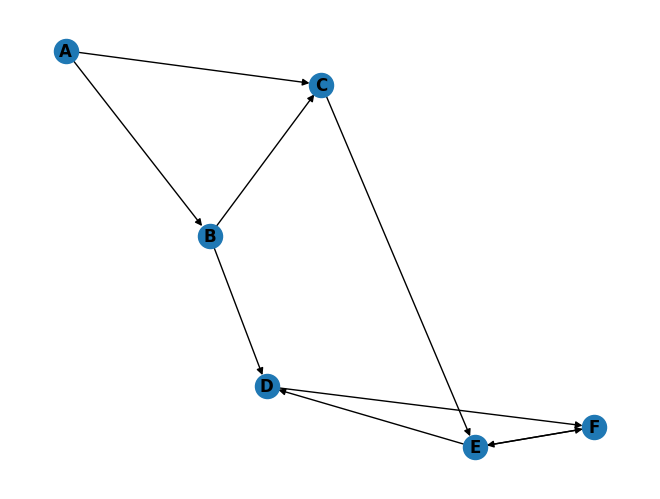

In [15]:
nx.draw(G_cycle, with_labels=True, font_weight='bold')

In [16]:
def init_matrice():
   mem1=[]
   for i in range(6):
        d=dict()
        for i in G_cycle.nodes(): 
            if i=='A':
                d[i]=0
            else:
             d[i]=np.inf
        mem1.append(d)
   return mem1

In [56]:
mem=init_matrice()
recursion_with_cycle(G_cycle,G_cycle.number_of_nodes()-1,'F',mem)

19

In [44]:
def bottom_up_cycle(G):
    mem=init_matrice()
    for i in range(G.number_of_nodes()):
        for v in G.nodes():
            for u in G.predecessors(v):
                dist=mem[i][u]+G[u][v]['weight']
                if dist<mem[i][v]:
                   mem[i][v]=dist
    return mem[-1]

In [61]:
bottom_up_cycle(G_cycle)

{'A': 0, 'B': 4, 'C': 2, 'D': 14, 'E': 5, 'F': 19}

# Temps d'execution

In [77]:
mem1={}
mem1['A']=0
dest='F'
sort_path_recur(G,dest,mem1)
timeit.timeit('sort_path_recur(G,dest,mem1)',globals=globals(),number=100000)

0.015827207999791426

In [78]:
timeit.timeit('bottom_up(G,"A")',globals=globals(),number=100000)

2.743504865000432

In [79]:
mem=init_matrice()
timeit.timeit('recursion_with_cycle(G_cycle,G_cycle.number_of_nodes()-1,"F",mem)',globals=globals(),number=100000)

0.05148394899970299

In [80]:
timeit.timeit('bottom_up_cycle(G_cycle)',globals=globals(),number=100000)

7.765665942000851